In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [126]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'] , index_col=['date'])

In [127]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


### `Clean data`

In [128]:
df = df[(df['value'] >= df['value'].quantile(0.025)) &
         (df['value'] <= df['value'].quantile(0.975))]

In [129]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


### Draw `Line Plot`

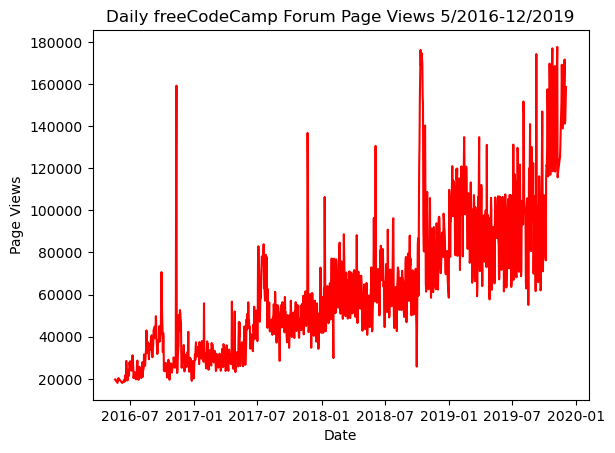

In [130]:
fig, ax = plt.subplots()
ax.plot(df.index, df['value'], color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

plt.show()

### Draw `Bar Plot`

In [131]:
df_bar = df.copy()

In [132]:
df_bar['month'] = df.index.month
df_bar['year'] = df.index.year

In [133]:
df_bar = df_bar.groupby(['year', 'month']) ['value'].mean()

In [134]:
df_bar = df_bar.unstack()

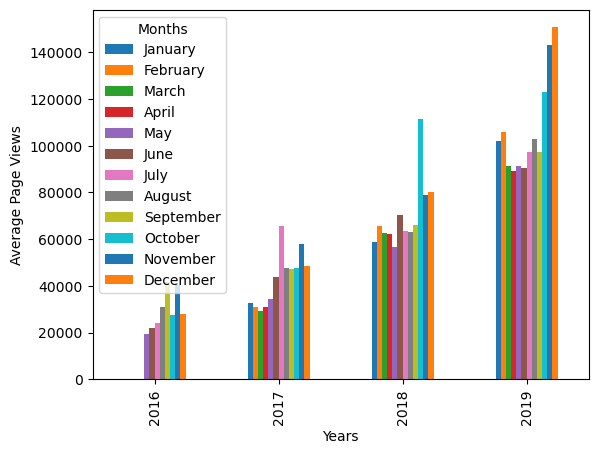

In [135]:
fig = df_bar.plot.bar(legend=True, xlabel='Years', ylabel='Average Page Views').figure

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.legend(months, title='Months')

plt.show()

### Draw `Box Plot` (using Seaborn)

In [158]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

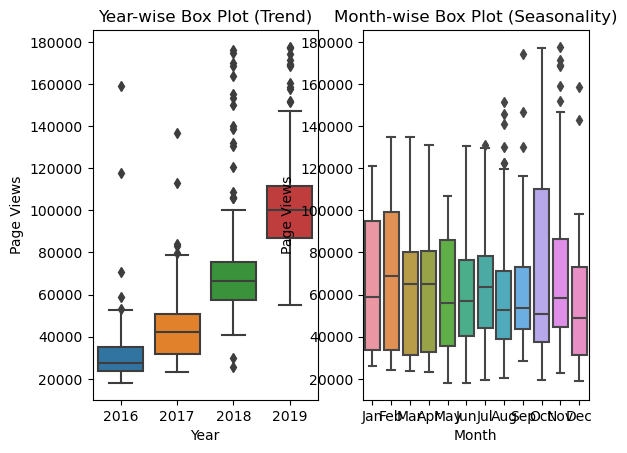

In [162]:
ax = plt.subplots(nrows=1, ncols=2)
fig, (ax1, ax2) = ax
    
month =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
ax1.set_title('Year-wise Box Plot (Trend)')
    
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
    
sns.boxplot(data= df_box, x='month', y='value', ax=ax2, order=month)
ax2.set_title('Month-wise Box Plot (Seasonality)')
    
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
plt.show()